In [44]:
from std_methods import std_methods

tickers = ['AAPL','JPM','F','PG', 'BA']

equal_weights,min_risk,risk_parity = std_methods(tickers,'1992-01-01','2021-18-31','2021-01-01','2023-12-31')

from enviroments.benchmark import create_env_benchmark


investment_period = 1 # each 1 investment days 
reward_period = 15 # each 15 investment periods
eval_env,eval_dates,eval_benchmark,prices = create_env_benchmark(tickers,'2021-01-01','2023-12-31',investment_period,reward_period)

[1.03715042e-02 0.00000000e+00 9.28374887e-01 6.12536090e-02
 1.84986726e-12]
[0.03536475 0.03244942 0.8907622  0.03699839 0.00442525]


In [45]:

import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import SAC
from DSAC import DSAC

def evaluate_model(model,env):
    done = False
    rewards = []
    portfolio_worths = []
    obs = env.reset()
    portfolio_worths.append(1.0)
    drawdowns = []
    max_worth = 1.0
    while not done:
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done,info = env.step(action)
        portfolio_worths.append(info[0]['porfolio_worth'])
        max_worth = max(max_worth,info[0]['porfolio_worth'])
        drawdown = (max_worth - info[0]['porfolio_worth'])
        drawdowns.append(drawdown)
        rewards.append(reward)
    return np.array(rewards),np.array(portfolio_worths),np.array(drawdowns)


def extract_portfolio(eval_env, eval_benchmark, model):
    rewards,portfolio_worths,drawdowns = evaluate_model(model,eval_env)
    freq = portfolio_worths.shape[0]//15
    print()
    monthly_portfolio_worths = portfolio_worths[::freq]
    
    monthly_portfolio_returns = np.log(monthly_portfolio_worths[1:]/monthly_portfolio_worths[:-1])
    
    print(monthly_portfolio_returns)
    sharpe_ratio = np.mean(monthly_portfolio_returns)/np.std(monthly_portfolio_returns)
    
    monthly_benchmark_worths = eval_benchmark[::freq]
    monthly_benchmark_returns = np.log(monthly_benchmark_worths[1:]/monthly_benchmark_worths[:-1])
    print(monthly_benchmark_returns)
    excess_returns = monthly_portfolio_returns - monthly_benchmark_returns
    information_ratio = np.mean(excess_returns)/np.std(excess_returns)
    max_drawdown = np.max(drawdowns)
    
    return portfolio_worths,sharpe_ratio,information_ratio,max_drawdown

def evaluate_SAC(model_path):
    model = SAC.load(f'./models/{model_path}.zip')
        
    portfolio_worths,sharpe_ratio,information_ratio,max_drawdown = extract_portfolio(eval_env, eval_benchmark, model)
    return portfolio_worths,sharpe_ratio,information_ratio,max_drawdown


def evaluate_DSAC(model_path):
    bare_model = DSAC(policy='MlpPolicy', env=eval_env, verbose=1)
    bare_model.set_parameters(f'./models/{model_path}.zip')
    
    portfolio_worths,sharpe_ratio,information_ratio,max_drawdown = extract_portfolio(eval_env, eval_benchmark, bare_model)
    return portfolio_worths,sharpe_ratio,information_ratio,max_drawdown



[ 0.15421681  0.04533796 -0.02183454  0.0106501   0.0984257  -0.12196653
 -0.1438192   0.13643541 -0.1381404   0.1109855   0.02340369  0.01269542
  0.07343343 -0.08855398  0.10183045]
[ 0.08834051  0.04296063  0.01832004  0.01007554  0.02618653 -0.09966923
 -0.03134399  0.02703147 -0.08316199  0.08536185 -0.03266612  0.03812025
  0.05903285 -0.03131552  0.10260041]
paper Sharpe Ratio: 0.17358434232587217,  Information Ratio: 0.03949937007379849, Final Portfolio Worth: 1.2821073180733902, Max Drawdown: 0.4643518931756123

[ 0.10947651  0.07032741 -0.0109044   0.03199574  0.14286556 -0.1226956
 -0.07285587  0.06453471 -0.1277539   0.0313477  -0.00066185  0.01149829
  0.04676223 -0.05001079  0.01319662]
[ 0.08834051  0.04296063  0.01832004  0.01007554  0.02618653 -0.09966923
 -0.03134399  0.02703147 -0.08316199  0.08536185 -0.03266612  0.03812025
  0.05903285 -0.03131552  0.10260041]
SAC max gain 0 Sharpe Ratio: 0.12211761235906282,  Information Ratio: -0.11506544893607473, Final Portfol

d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 1.10GB
  warnings.warn(



[ 0.10947651  0.07032741 -0.0109044   0.03199574  0.14286556 -0.1226956
 -0.07285587  0.06453471 -0.1277539   0.0313477  -0.00066185  0.01149829
  0.04676223 -0.05001079  0.01319662]
[ 0.08834051  0.04296063  0.01832004  0.01007554  0.02618653 -0.09966923
 -0.03134399  0.02703147 -0.08316199  0.08536185 -0.03266612  0.03812025
  0.05903285 -0.03131552  0.10260041]
SAC max gain 0.5 Sharpe Ratio: 0.12211761235906282,  Information Ratio: -0.11506544893607473, Final Portfolio Worth: 1.1418240654340959, Max Drawdown: 0.43908305577220363


d:\.war\satan\.venv\Lib\site-packages\stable_baselines3\common\buffers.py:241: UserWarning: This system does not have apparently enough memory to store the complete replay buffer 1.15GB > 1.14GB
  warnings.warn(



[ 0.19208445  0.07503957  0.00853529  0.06479912  0.13395065 -0.20665729
 -0.11327748  0.09356452 -0.13482953 -0.02274311  0.08687195  0.04669064
  0.09381626 -0.05306562  0.08331307]
[ 0.08834051  0.04296063  0.01832004  0.01007554  0.02618653 -0.09966923
 -0.03134399  0.02703147 -0.08316199  0.08536185 -0.03266612  0.03812025
  0.05903285 -0.03131552  0.10260041]
SAC max gain 0.75 Sharpe Ratio: 0.21931754718122154,  Information Ratio: 0.11796579193703317, Final Portfolio Worth: 1.4088859939770575, Max Drawdown: 0.689657997503007

[ 0.20200922  0.07266486 -0.04295999  0.05832103  0.07368679 -0.15017708
 -0.08878393  0.04071389 -0.08470481  0.01729969  0.02816888  0.00320266
  0.07384464 -0.04762385  0.05721164]
[ 0.08834051  0.04296063  0.01832004  0.01007554  0.02618653 -0.09966923
 -0.03134399  0.02703147 -0.08316199  0.08536185 -0.03266612  0.03812025
  0.05903285 -0.03131552  0.10260041]
SAC max gain 1 Sharpe Ratio: 0.16953375551339686,  Information Ratio: -0.009005315352890897, 

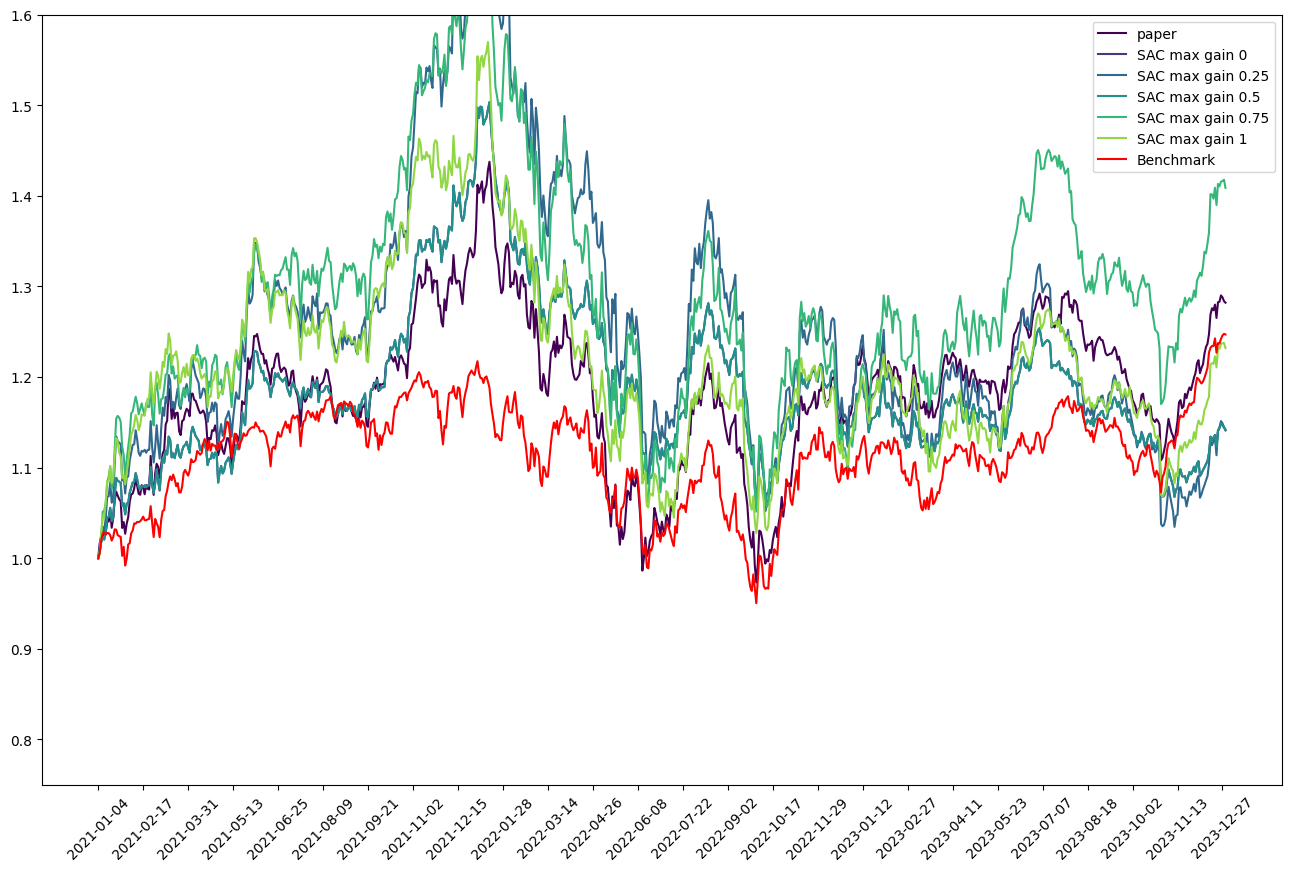

In [46]:
models = {
    'paper': 'paper',
    # 'DSAC benchmark 0': 'DSAC_benchmark_risk_0_inv_1_rew_15',
    # 'DSAC benchmark 0.25': 'DSAC_benchmark_risk_0.25_inv_1_rew_15',
    # 'DSAC benchmark 0.5': 'DSAC_benchmark_risk_0_inv_1_rew_15',
    # 'DSAC benchmark 0.75': 'DSAC_benchmark_risk_0.75_inv_1_rew_15',
    # 'DSAC benchmark 1': 'DSAC_benchmark_risk_1_inv_1_rew_15',
    'SAC max gain 0': 'SAC_max_gain_risk_0_inv_1_rew_15',
    'SAC max gain 0.25': 'SAC_max_gain_risk_0.25_inv_1_rew_15',
    'SAC max gain 0.5': 'SAC_max_gain_risk_0_inv_1_rew_15',
    'SAC max gain 0.75': 'SAC_max_gain_risk_0.75_inv_1_rew_15',
    'SAC max gain 1': 'SAC_max_gain_risk_1_inv_1_rew_15',
}

plt.figure(figsize=(16,10))
i = 0

for model_name,model_path in models.items():
    if 'DSAC' in model_path:
        portfolio_worths, sharpe_ratio, information_ratio, max_drawdown = evaluate_DSAC(model_path)
    else:
        portfolio_worths, sharpe_ratio, information_ratio, max_drawdown = evaluate_SAC(model_path)
    print(f'{model_name} Sharpe Ratio: {sharpe_ratio},  Information Ratio: {information_ratio}, Final Portfolio Worth: {portfolio_worths[-1]}, Max Drawdown: {max_drawdown}')
    
    plt.plot(eval_dates,portfolio_worths, linestyle='-',label=f'{model_name}', color = plt.cm.viridis(i/len(models)))
    i += 1
    
eval_benchmark_relative = eval_benchmark/eval_benchmark[0]

plt.plot(eval_dates,eval_benchmark_relative, label='Benchmark', color='red')

plt.xticks(eval_dates[::(len(eval_dates)//25)],rotation=45)
plt.ylim(0.75,1.6)
plt.legend()